# Spotify Music Data


## Data dictionary

|    | Variable   | Explanation                                                |
|---:|:-----------|:-----------------------------------------------------------|
|  0 | title      | The title of the song                                      |
|  1 | artist     | The artist of the song                                     |
|  2 | top genre  | The genre of the song                                      |
|  3 | year       | The year the song was in the Billboard                     |
|  4 | bpm        | Beats per minute: the tempo of the song                    |
|  5 | nrgy       | The energy of the song: higher values mean more energetic (fast, loud)  |
|  6 | dnce       | The danceability of the song: higher values mean it's easier to dance to  |
|  7 | dB         | Decibel: the loudness of the song  |
|  8 | live       | Liveness: likeliness the song was recorded with a live audience  |
|  9 | val        | Valence: higher values mean a more positive sound (happy, cheerful) |
| 10 | dur        | The duration of the song |
| 11 | acous      | The acousticness of the song: likeliness the song is acoustic|
| 12 | spch       | Speechines: higher values mean more spoken words |
| 13 | pop        | Popularity: higher values mean more popular|



## Importando as bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_csv("spotify-top-music.csv", index_col=0)



## Inspecionando o dataset

In [3]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


Using the method .info(), we can get more details about the data such as the type of the variables and how many entries were collected in order to group as a dataset.

Another important information about the data is if there are missing values. Using the method isnull() combined with any(), we check both columns and rows if there is any issue regarding the observations collected:


In [5]:
df.isnull().any()

title        False
artist       False
top genre    False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [6]:
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


## Top Artists by Number of Hits

In [7]:
df_top_artists = df.groupby("artist")["title"].count().sort_values(ascending=False).reset_index(drop=False)
df_top_artists[:10]

,artist,title
0,Katy Perry,17
1,Justin Bieber,16
2,Maroon 5,15
3,Rihanna,15
4,Lady Gaga,14
5,Bruno Mars,13
6,Shawn Mendes,11
7,Ed Sheeran,11
8,Pitbull,11
9,The Chainsmokers,11


In [20]:
artists_average_bpm = df.groupby(["artist"])["bpm"].mean().sort_values(ascending=False).reset_index()
artists_average_bpm[:10]

,artist,bpm
0,Joey Montana,186.000000
1,Sara Bareilles,185.000000
2,Luis Fonsi,178.000000
3,James Arthur,170.000000
4,Avril Lavigne,167.000000
5,5 Seconds of Summer,160.000000
6,Adam Lambert,158.500000
7,Fergie,154.000000
8,Neon Trees,151.500000
9,Jessie J,150.666667


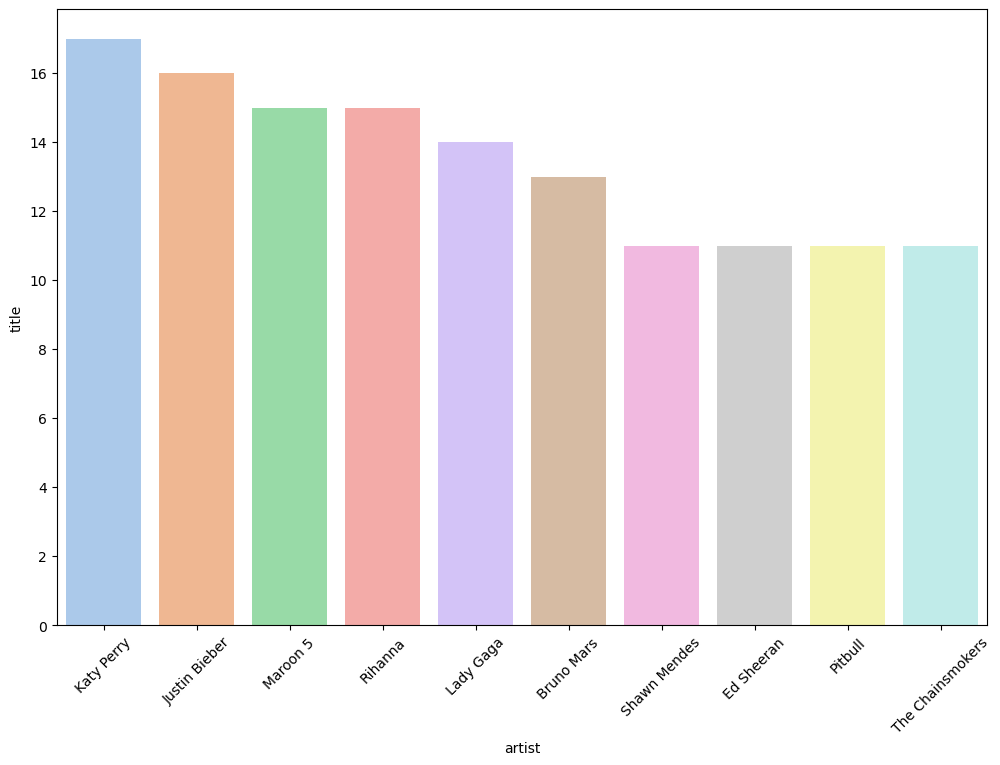

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_top_artists[:10], x="artist", y="title",palette="pastel")
plt.xticks(rotation=45)
plt.show()

## Most Hits in a Single Year

In [9]:
df_hits_per_year = df.groupby(["year", "artist"])["title"].count().sort_values(ascending=False).reset_index(drop=False)
df_hits_per_year[:10]

,year,artist,title
0,2015,Justin Bieber,9
1,2011,Lady Gaga,5
2,2019,Ed Sheeran,5
3,2011,Beyoncé,4
4,2018,Shawn Mendes,4
5,2010,The Black Eyed Peas,4
6,2011,Jennifer Lopez,4
7,2014,Birdy,4
8,2015,Ed Sheeran,4
9,2011,Rihanna,4


sns.barplot(data=df_hits_per_year, x=)

## Top Artists by Year

In [26]:
df_top_artists_year = df.groupby(["year","artist"]).size().reset_index(name='count')
df_top_artists_year = df_top_artists_year.groupby("year").apply(lambda x:x[x["count"] == x['count'].max()]).reset_index(drop=True)
df_top_artists_year

,year,artist,count
0,2010,Christina Aguilera,4
1,2010,Kesha,4
2,2010,The Black Eyed Peas,4
3,2011,Lady Gaga,5
4,2012,Katy Perry,3
5,2012,Rihanna,3
6,2013,Justin Timberlake,4
7,2014,Birdy,4
8,2015,Justin Bieber,9
9,2016,Adele,4


## Top Artists by the Sum of Popularity

In [10]:
df_sum_pop = df.groupby("artist")["pop"].sum().sort_values(ascending=False).reset_index(drop=False)
df_sum_pop[:10]

,artist,pop
0,Justin Bieber,1150
1,Maroon 5,1123
2,Katy Perry,1056
3,Rihanna,981
4,Lady Gaga,964
5,Bruno Mars,936
6,Ed Sheeran,862
7,Shawn Mendes,851
8,The Chainsmokers,839
9,Calvin Harris,782


## BPM x Popularity

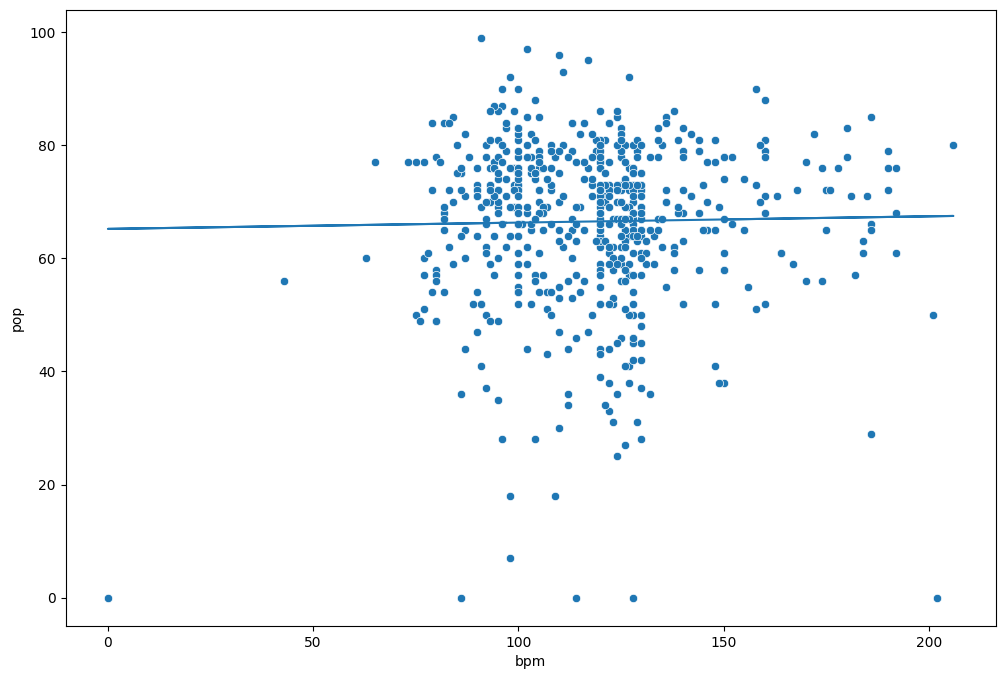

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="bpm", y="pop")
reg_bpm_pop = LinearRegression()
bpm = np.array(df['bpm'])
bpm = bpm.reshape(-1,1)
pop = np.array(df['pop'])
pop = pop.reshape(-1,1)
reg_bpm_pop.fit(bpm, pop)
line_predicted = reg_bpm_pop.predict(bpm)
plt.plot(bpm, line_predicted)
plt.show()

## Danceability x Popularity

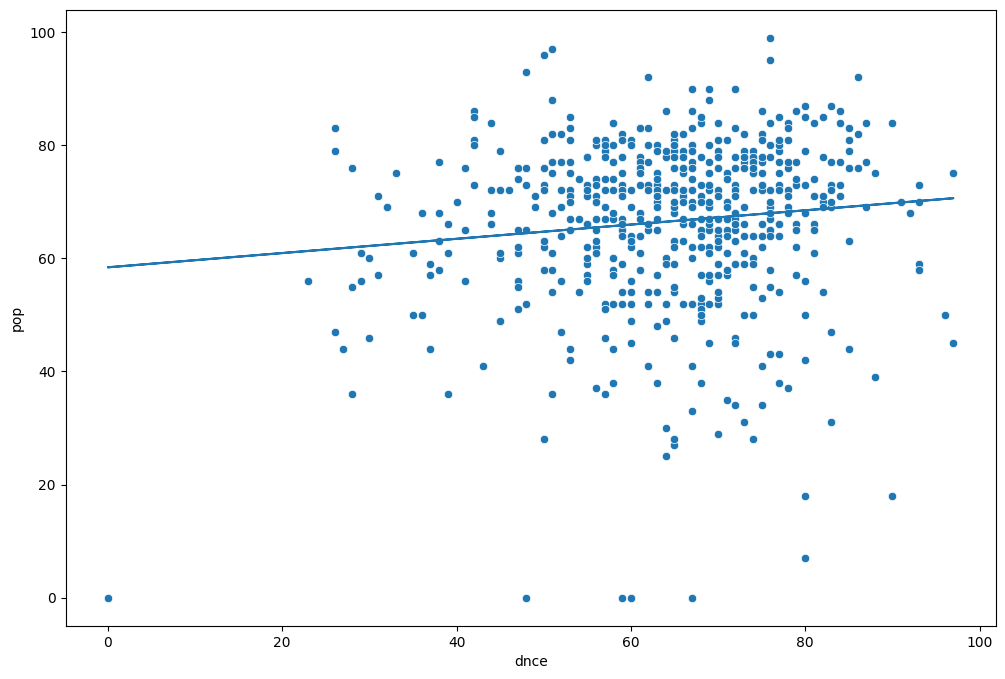

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="dnce", y="pop")
reg_dnce_pop = LinearRegression()
dnce = np.array(df['dnce'])
dnce = dnce.reshape(-1,1)
pop = np.array(df['pop'])
pop = pop.reshape(-1,1)
reg_dnce_pop.fit(dnce, pop)
line_predicted_dnce = reg_dnce_pop.predict(dnce)
plt.plot(dnce, line_predicted_dnce)
plt.show()